<a href="https://colab.research.google.com/github/JeanneLecleach/NI2_Data_science_assignment/blob/main/Assignment/Python/NextImmun2PythonFinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This Jupyter Notebook serves as a demo Workflow of cleaning and exploring IgE measurements with Pax for an allergen panel involve testing blood samples to detect Immunoglobulin E (IgE) antibody levels against specific allergens using the Pax system.

Fill in the empty code cells below. Feel free to add more code cells if needed.

### Data upload:
- Use the upload button on the left to upload the file: 'PAX_Data.xlsx'
- By default the data should have been upload to into the folder '/content'

## Load the required modules
- Just run the following code-cell to load all modules needed for this exercise

In [1]:
import os
import pandas as pd
import numpy as np

### Checking the working directory:
- use 'os.getcwd()' method to check for the current working directory.
- If you are using Google Colab, the default working directory should be the folder 'content'
- If not, use the 'os. chdir(<path>)' method to make sure to set the working directory

In [2]:
os.getcwd()

'/content'

## Read the excel file
- if you are not using Google Colab, make sure to set the path to your data file correctly: \'<FILE-PATH\>/PAX_Data.xlsx'
- use: 'Sheet1' as sheet_name
- ignore the header: header=None
- assign the loaded data to a variable called: df


In [6]:
df = pd.read_excel("PAX_Data.xlsx", sheet_name="Sheet1", header=None) #No header prevent 1st row to be used as column names
df.head()

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,Date of test,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,...,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30
1,Test number,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
2,Country,Spain,Netherland,Germany,Germany,Netherland,Sweden,Germany,Germany,UK,...,Slovenia,Poland,Belgium,Norway,Netherland,Slovenia,UK,Netherland,UK,Spain
3,Age Y/M,3Years 11Months,2Years 8Months,2Years 8Months,7Years 9Months,11Years 11Months,4Years 8Months,1Years 9Months,6Years 9Months,3Years 8Months,...,8Years 8Months,3Years 7Months,3Years 7Months,1Years 5Months,1Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months
4,Sex,Female,Male,Male,Female,Male,Female,Male,Female,Female,...,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male


### Print the 'shape' of the dataframe

In [7]:
df.shape

(250, 6616)

### Print the number of rows:

In [8]:
num_rows = df.shape[0]
print(num_rows)

250


### Use the 'head' method to have a look at the first 10 rows of the table

In [9]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,Date of test,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,...,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30
1,Test number,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
2,Country,Spain,Netherland,Germany,Germany,Netherland,Sweden,Germany,Germany,UK,...,Slovenia,Poland,Belgium,Norway,Netherland,Slovenia,UK,Netherland,UK,Spain
3,Age Y/M,3Years 11Months,2Years 8Months,2Years 8Months,7Years 9Months,11Years 11Months,4Years 8Months,1Years 9Months,6Years 9Months,3Years 8Months,...,8Years 8Months,3Years 7Months,3Years 7Months,1Years 5Months,1Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months
4,Sex,Female,Male,Male,Female,Male,Female,Male,Female,Female,...,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male
5,Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
6,rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
7,Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
8,Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
9,rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96


### Splitting the Data:
- As you can see, row 0 to 4 contains the metadata of the experiment
- Row 5 to end contains the measured expression data of Allergens

Now, we need to split the data into:
- Metadata and
- Expression data

Check the documentation of the pandas method 'iloc'
- Split the data, row 0 to 4 and assing it to a variable called: md
- From row 5 to end, assing the expression data to a variable called: expr

In [11]:
md = df.iloc[0:5,]
md.head()

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,Date of test,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,...,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30
1,Test number,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
2,Country,Spain,Netherland,Germany,Germany,Netherland,Sweden,Germany,Germany,UK,...,Slovenia,Poland,Belgium,Norway,Netherland,Slovenia,UK,Netherland,UK,Spain
3,Age Y/M,3Years 11Months,2Years 8Months,2Years 8Months,7Years 9Months,11Years 11Months,4Years 8Months,1Years 9Months,6Years 9Months,3Years 8Months,...,8Years 8Months,3Years 7Months,3Years 7Months,1Years 5Months,1Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months
4,Sex,Female,Male,Male,Female,Male,Female,Male,Female,Female,...,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male


In [23]:
expr = df.iloc[5:,]
expr.head()

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
5,Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
6,rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
7,Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
8,Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
9,rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96


### Print the 'shape' of each new table

In [17]:
print(md.shape)
print(expr.shape)

(5, 6616)
(245, 6616)


### Use the 'head' method to inspect the expr table


In [18]:
expr.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
5,Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
6,rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
7,Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
8,Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
9,rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96
10,Pas n,21.17,22.28,21.03,21.77,20.55,19.32,30.85,23.31,20.62,...,21.95,22.21,19.55,21.57,18.23,19.71,21.6,20.64,18.91,18.46
11,rPhl p 1,21.77,22.96,21.61,21.55,20.79,22.83,24.76,26.11,21.89,...,21.16,21.13,22.19,20.32,23,20.39,20.86,20.56,20.19,19.3
12,rPhl p 2,19.92,19.45,21.01,19.59,20.08,16.71,20.64,21.75,19.86,...,20.09,18.35,19.01,19.72,19.71,18.6,17.59,19.58,19.38,18.01
13,rPhl p 5.0101,21.79,19.07,20.15,19.72,23.4,19.61,23.81,21.44,18.77,...,19.72,19.68,21.86,19.21,47.15,19.98,22.94,19.48,21.48,20.64
14,rPhl p 6,22.25,20.69,23.09,19.94,19.59,18.8,23.23,21.69,18.37,...,20.43,18.33,19.35,19.79,20.39,19.94,19.59,24.45,19.06,20.69


As you can see column 0 contains the name of the Allergens

- Set the Allergen names as the index of the table (similar to rownames in R)example:   'expr.index = ...'
- 'drop' the column 0 and override the current variable

In [24]:
expr = expr.set_index(expr.columns[0]) #pushes the column 0 to become the row index, don't need to remove it afterwards
expr.index.name = 'Allergen'
expr.head()

,1,2,3,4,5,6,7,8,9,10,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
Allergen,,,,,,,,,,,,,,,,,,,,,
Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,17.64,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,22.32,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,19.35,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,22.08,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,22.06,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96


### Cleaning the Metadata
- Use 'head' to look into the metadata
Note that we want to use the rows as columns, therefore:
- Transpose the metadata
- Change the table: row 0 should be the column names

In [25]:
md.head()

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,Date of test,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,...,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30
1,Test number,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
2,Country,Spain,Netherland,Germany,Germany,Netherland,Sweden,Germany,Germany,UK,...,Slovenia,Poland,Belgium,Norway,Netherland,Slovenia,UK,Netherland,UK,Spain
3,Age Y/M,3Years 11Months,2Years 8Months,2Years 8Months,7Years 9Months,11Years 11Months,4Years 8Months,1Years 9Months,6Years 9Months,3Years 8Months,...,8Years 8Months,3Years 7Months,3Years 7Months,1Years 5Months,1Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months
4,Sex,Female,Male,Male,Female,Male,Female,Male,Female,Female,...,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male


In [54]:
T_md = md.T
T_md.head()

,0,1,2,3,4
0,Date of test,Test number,Country,Age Y/M,Sex
1,2023-04-13,2334000487D,Spain,3Years 11Months,Female
2,2023-04-13,2331000683D,Netherland,2Years 8Months,Male
3,2023-04-13,2331000884D,Germany,2Years 8Months,Male
4,2023-04-13,2331000880D,Germany,7Years 9Months,Female


In [55]:
T_md = T_md.set_index(T_md.columns[0]) #pushes the column 0 to become the row index, don't need to remove it afterwards
T_md.index.name = ""
T_md.head()

,1,2,3,4
,,,,
Date of test,Test number,Country,Age Y/M,Sex
2023-04-13,2334000487D,Spain,3Years 11Months,Female
2023-04-13,2331000683D,Netherland,2Years 8Months,Male
2023-04-13,2331000884D,Germany,2Years 8Months,Male
2023-04-13,2331000880D,Germany,7Years 9Months,Female


- Make sure to remove the first row, which now has become the column names

In [56]:
T_md.columns = T_md.iloc[0]
T_md.head()
T_md = T_md.drop("Date of test") #name/index of the row
T_md.head()

Date of test,Test number,Country,Age Y/M,Sex
,,,,
2023-04-13,2334000487D,Spain,3Years 11Months,Female
2023-04-13,2331000683D,Netherland,2Years 8Months,Male
2023-04-13,2331000884D,Germany,2Years 8Months,Male
2023-04-13,2331000880D,Germany,7Years 9Months,Female
2023-04-13,2331000851D,Netherland,11Years 11Months,Male


### Use 'head' to inspect your table and make sure it looks as below:

	Date of test Test number	Country	Age Y/M**

1	2023-04-13	2334000487D	Spain	3Years 11Months

2	2023-04-13	2331000683D	Netherland	2Years 8Months

3	2023-04-13	2331000884D	Germany	2Years 8Months

4	2023-04-13	2331000880D	Germany	7Years 9Months

5	2023-04-13	2331000851D	Netherland	11Years 11Months

In [57]:
T_md.head()

Date of test,Test number,Country,Age Y/M,Sex
,,,,
2023-04-13,2334000487D,Spain,3Years 11Months,Female
2023-04-13,2331000683D,Netherland,2Years 8Months,Male
2023-04-13,2331000884D,Germany,2Years 8Months,Male
2023-04-13,2331000880D,Germany,7Years 9Months,Female
2023-04-13,2331000851D,Netherland,11Years 11Months,Male


### Rename the Metadata columns
- rename the columns 'Date of test' to 'Date', 'Test number' to 'TestID' and 'Age Y/M' to 'Age (M)'

In [58]:
T_md = T_md.rename(columns={
    'Date of test': 'Date',
    'Test number': 'TestID',
    'Age Y/M': 'Age (M)'
})
T_md.head()

Date of test,TestID,Country,Age (M),Sex
,,,,
2023-04-13,2334000487D,Spain,3Years 11Months,Female
2023-04-13,2331000683D,Netherland,2Years 8Months,Male
2023-04-13,2331000884D,Germany,2Years 8Months,Male
2023-04-13,2331000880D,Germany,7Years 9Months,Female
2023-04-13,2331000851D,Netherland,11Years 11Months,Male


### Convert the Age column
The function below converts a string into a number of total month e.g.:

"2Years 8Months" convert to 32.0

- use the below function to convert each 'string' from the Age column into a number (float)
- Hint: check the function '.apply(convert_to_month)' which works on a dataframe column

In [97]:
import re

def convert_to_months(duration_str):
        # Check for missing or empty entries
    if pd.isnull(duration_str) or duration_str.strip() == "":
        return None


    # Regular expression to find years and months in the input string
    year_pattern = re.compile(r"(\d+)\s*Years?")
    month_pattern = re.compile(r"(\d+)\s*Months?")

    # Search for years and months in the input string
    years_match = year_pattern.search(duration_str)
    months_match = month_pattern.search(duration_str)

    # Extract years and months from the matches
    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    # Convert years to months and add to months
    total_months = (years * 12) + months

    return int(total_months)


In [99]:
# convert md['Age (M)'] to number
# write your code here:
T_md['Age (M)'] = T_md['Age (M)'].apply(convert_to_months) #error message but seems to work after

AttributeError: 'float' object has no attribute 'strip'

In [100]:
T_md.head()

Date of test,TestID,Country,Age (M),Sex
,,,,
2023-04-13,2334000487D,Spain,47.0,Female
2023-04-13,2331000683D,Netherland,32.0,Male
2023-04-13,2331000884D,Germany,32.0,Male
2023-04-13,2331000880D,Germany,93.0,Female
2023-04-13,2331000851D,Netherland,143.0,Male


Check the result with 'head'

### Rename the columns of expr
- use the Test Number from md['Test number'] as new column names for the expr data

In [103]:
expr.columns = T_md['TestID']
expr.head()

TestID,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,2334000522D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
Allergen,,,,,,,,,,,,,,,,,,,,,
Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,17.64,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,22.32,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,19.35,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,22.08,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,22.06,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96


### Print the shapes of both tables
- check if the number of columns in expr matches the number of rows in md

### Dropping duplicates and keep='first'

In [113]:
# This function can be use to inspect if there a duplictes within a column
T_md['TestID'].duplicated()


2023-04-13    False
2023-04-13    False
2023-04-13    False
2023-04-13    False
2023-04-13    False
              ...  
2023-06-30    False
2023-06-30    False
2023-06-30     True
2023-06-30    False
2023-06-30    False
Name: TestID, Length: 6615, dtype: bool

In [157]:
# remove duplicate values in TestID column
# Hint: check the function: 'drop_duplicates'
# Hint: use the parameter 'keep='first'' to keep the first occurance and remove following duplicates
T_md.drop_duplicates(subset=['TestID'], keep='first')

Date of test,TestID,Country,Age (M),Sex
,,,,
2023-04-13,2334000487D,Spain,47.0,Female
2023-04-13,2331000683D,Netherland,32.0,Male
2023-04-13,2331000884D,Germany,32.0,Male
2023-04-13,2331000880D,Germany,93.0,Female
2023-04-13,2331000851D,Netherland,143.0,Male
...,...,...,...,...
2023-06-30,2334002233D,Slovenia,104.0,Female
2023-06-30,2334002232D,Slovenia,29.0,Male
2023-06-30,2344000712D,UK,29.0,Male


### Don't forget to drop the duplicates on the expression data as well:

In [124]:
# example:

# df = df.loc[:, ~df.columns.duplicated()]

# where df.columns.duplicated(): returns a boolean array of duplicates
# ~ negates the boolean values: True is False and False is True
expr_modif = expr.loc[:, ~expr.columns.duplicated()]
print(expr_modif.shape)

(245, 5814)


### Print the shapes of both table and make sure the number of rows in md and the number of columns in expr are matching

In [158]:
print(T_md.shape)
print(expr_modif.shape) #after removing duplicates in "expr" the column number is different but otherwise it's the same

(6615, 4)
(245, 5814)


### Saving the DATA
After initial cleaning, let's save the data in its current form:
- save both tables as csv file in the current directory

In [116]:
T_md.to_csv("metadata.csv")
expr.to_csv("expression_data.csv")

### Subsetting the data
- subset the metadata and expression data to county = 'Spain'

Hint: use the TestID on the filtered data to subset on the expression data

In [108]:
md_spain = T_md.loc[T_md.Country == 'Spain', :] #retrieve all information from participants in Spain

testIdSpain = T_md.TestID[T_md.Country == 'Spain'] #retrieve only test ID from participants in Spain

- Print the shapes to check the result

In [110]:
print(md_spain.head)
print(testIdSpain.head)
print(md_spain.shape)
print(testIdSpain.shape)

<bound method NDFrame.head of Date of test       TestID Country  Age (M)     Sex
                                                  
2023-04-13    2334000487D   Spain     47.0  Female
2023-04-13    2334000505D   Spain     20.0  Female
2023-04-13    2334000499D   Spain     44.0  Female
2023-04-13    2334000473D   Spain     81.0  Female
2023-04-13    2334000501D   Spain     93.0  Female
...                   ...     ...      ...     ...
2023-06-29    2334002204D   Spain     70.0    Male
2023-06-29    2334002203D   Spain     64.0    Male
2023-06-30    2334002208D   Spain     31.0  Female
2023-06-30    2334002235D   Spain    134.0  Female
2023-06-30    2334002236D   Spain     29.0    Male

[628 rows x 4 columns]>
<bound method NDFrame.head of 
2023-04-13    2334000487D
2023-04-13    2334000505D
2023-04-13    2334000499D
2023-04-13    2334000473D
2023-04-13    2334000501D
                 ...     
2023-06-29    2334002204D
2023-06-29    2334002203D
2023-06-30    2334002208D
2023-06-30    233

# Exploration of the expression data
To gain an initial understanding of the expression data, we need to filter out the noise. Currently, noise is defined as values below 30.

- Convert the expr dataframe into a numpy array
- Set values below 30 to 0.0

Remove rows were all values are 0
- use the 'sum' method (axsis = 1) to the the sums of each row
- use this rowsum values to subset the array

In [134]:
# Convert to numpy
expr_array = expr.to_numpy()
print(expr_array)

[[18.5 19.67 20.11 ... 17.05 19.03 16.73]
 [22.99 21.95 20.66 ... 21.07 21.4 20.12]
 [19.15 19.57 21.78 ... 18.67 21.01 17.4]
 ...
 [23.43 24.02 24.02 ... 21.65 20.97 19.07]
 [27.51 27.94 27.94 ... 15.66 15.44 14.9]
 [27 25.61 25.61 ... 17.25 17.76 16.76]]


In [135]:
# Set values below 30 to 0
# Hint:
# 'my_array < value' will return a boolean array which can be used
expr_array[expr_array < 30] = 0

In [141]:
print(expr_array)
print("Number of non-zero values:", np.count_nonzero(expr_array))
print("Number of zero values:", np.sum(expr_array == 0))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Number of non-zero values: 24241
Number of zero values: 1400189


In [147]:
# Calculate row sums
row_sum = expr_array.sum(axis=1)
print(row_sum)
print("Number of non-zero values:", np.count_nonzero(row_sum))
print("Number of zero values:", np.sum(row_sum == 0))

# Filter rows where the sum is not 0
expr_array_filtered = expr_array[row_sum != 0] #I don't know why I have an array of 0 values, did not find the error
print(expr_array_filtered)
print(expr_array_filtered.shape)

[436.54 4875.210000000001 8081.570000000003 13641.989999999998 16682.5
 11900.829999999994 20082.739999999998 16270.390000000005 18826.25
 18165.979999999996 11356.640000000001 7469.499999999999 14584.77
 15030.599999999999 3141.8900000000003 2343.34 5804.31 6942.1
 12479.239999999994 10163.04 28295.809999999998 4844.950000000001 7909.82
 2671.8200000000006 10149.869999999999 32188.41999999999
 39534.460000000036 11471.839999999995 13605.069999999996
 6265.239999999999 12215.9 13636.130000000001 9818.969999999998
 4587.250000000001 900.41 246.86 22622.08999999999 195.29 8312.0
 860.9600000000003 13433.420000000002 1211.19 3844.3300000000004
 2223.4100000000003 5148.34 10418.439999999993 3307.85 8214.899999999998
 22611.059999999998 7909.0 3669.3399999999997 1929.1800000000003 1918.94
 8154.4400000000005 5169.01 77171.95000000001 6695.869999999999
 34090.26000000002 8407.5 14584.93 8453.860000000002 631.95 514.36
 1490.8200000000002 317.82 340.55 1822.1499999999999 114.5 314.5 691.12
 1

### Visualize the Expression Data

The follwing code is provided. Just make sure you replace the names of the variables with your variable names.

In [148]:
print(expr_array_filtered)

[0 0 0 ... 0 0 0]


In [150]:
import seaborn as sns
# import pandas as pd
from sklearn.cluster import KMeans  # Example clustering algorithm
from sklearn.preprocessing import StandardScaler

In [153]:
# Standardize data (optional)
scaler = StandardScaler()
scaled_exp = scaler.fit_transform(expr_array) # It's not working with the filtered array as it has only 0 values

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


RecursionError: maximum recursion depth exceeded while getting the str of an object

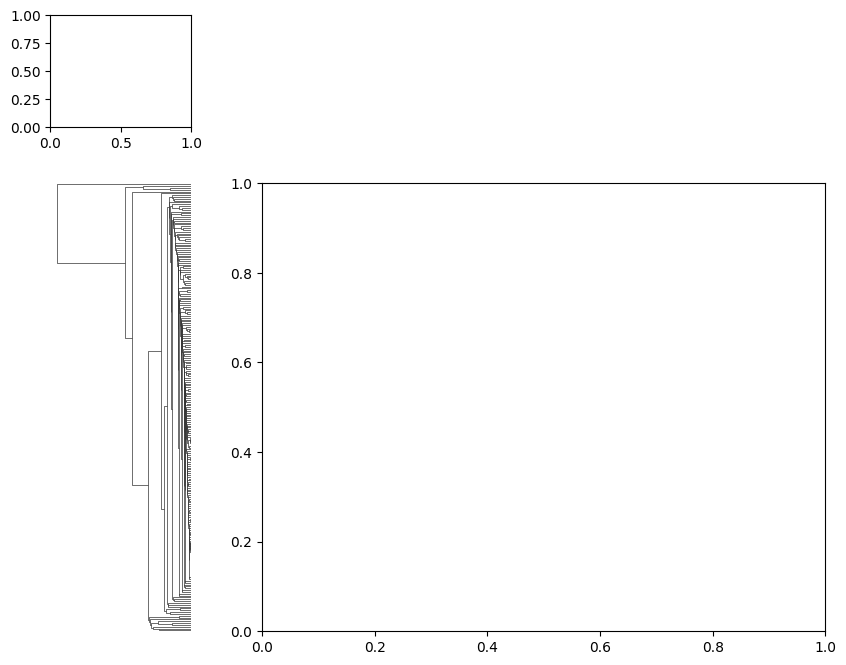

In [156]:
# Create the clustermap with hierarchical clustering
sns.clustermap(scaled_exp,
               method='ward',  # Linkage method (ward, single, complete, average, etc.)
               metric='euclidean',  # Distance metric (euclidean, cityblock, etc.)
               cmap="YlGnBu",       # Colormap
               figsize=(10, 8))    # Figure size

### Right click the plot and save the heatmap as image

# Done. Congratulations!